In [1]:
#import all the header files
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

Using TensorFlow backend.


In [2]:
#defining width, height and the respective directories 
img_width, img_height = 150,150
train_data_direc = '/home/surya/yogesh/data/train'
validation_data_direc = '/home/surya/yogesh/data/validation'
no_of_train_images = 24000
no_of_validation_images = 1000
epochs = 10
batch_size = 256


In [3]:
K.image_data_format()

'channels_last'

In [4]:
#check the compatability such as theano or tensorflow from -/keras.json file 
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [5]:
#define an model using this statement 
mymodel = Sequential()

In [6]:
#use model_name.add to add corresponding number of layers as required 
mymodel.add(Conv2D(32,(3,3), input_shape=input_shape))
mymodel.add(Activation('relu'))
mymodel.add(MaxPooling2D(pool_size=(2, 2)))

mymodel.add(Conv2D(32,(3,3)))
mymodel.add(Activation('relu'))
mymodel.add(MaxPooling2D(pool_size=(2, 2)))

mymodel.add(Conv2D(64,(3,3)))
mymodel.add(Activation('relu'))
mymodel.add(MaxPooling2D(pool_size=(2, 2)))

mymodel.add(Flatten())
mymodel.add(Dense(64))
mymodel.add(Activation('relu'))
mymodel.add(Dropout(0.5))
mymodel.add(Dense(1))
mymodel.add(Activation('sigmoid'))

In [7]:
#this statement is used to compile the above mentioned model 
mymodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
#you will use this augmentation technique on the train dataset 
train_single_image = ImageDataGenerator(
                                            rescale=1. /255,
                                            shear_range = 0.2,
                                            zoom_range= 0.2,
                                            horizontal_flip=True )


In [9]:
#implement only the recaling on the validataion data
test_single_image = ImageDataGenerator(rescale= 1. / 255)

In [10]:
%pwd

'/home/surya/yogesh'

In [11]:
#no wdo the operation for all the images in the train and the test data 
trainimages_generator= train_single_image.flow_from_directory(
                                                                train_data_direc,
                                                                target_size=(img_width,img_height),
                                                                batch_size= batch_size,
                                                                class_mode='binary'    
                                                                )

Found 23000 images belonging to 2 classes.


In [12]:
#do the same for the validation data 
validationimages_generator= test_single_image.flow_from_directory(
                                                                    validation_data_direc,
                                                                    target_size=(img_width, img_height),
                                                                    batch_size=batch_size,
                                                                    class_mode='binary',
                                                                    )


Found 2000 images belonging to 2 classes.


In [13]:
history = mymodel.fit_generator(
                                    trainimages_generator,
                                    steps_per_epoch=no_of_train_images // batch_size,
                                    epochs= epochs,
                                    validation_data=validationimages_generator,
                                    validation_steps= no_of_validation_images // batch_size)

Epoch 1/10
93/93 [==============================] - 89s - loss: 0.6797 - acc: 0.5643 - val_loss: 0.6293 - val_acc: 0.6523
Epoch 2/10
93/93 [==============================] - 87s - loss: 0.5864 - acc: 0.6880 - val_loss: 0.5148 - val_acc: 0.7435
Epoch 3/10
93/93 [==============================] - 88s - loss: 0.5344 - acc: 0.7365 - val_loss: 0.4876 - val_acc: 0.7695
Epoch 4/10
93/93 [==============================] - 87s - loss: 0.4974 - acc: 0.7584 - val_loss: 0.4382 - val_acc: 0.7865
Epoch 5/10
93/93 [==============================] - 87s - loss: 0.4651 - acc: 0.7849 - val_loss: 0.4376 - val_acc: 0.7904
Epoch 6/10
93/93 [==============================] - 87s - loss: 0.4345 - acc: 0.8027 - val_loss: 0.3601 - val_acc: 0.8490
Epoch 7/10
93/93 [==============================] - 87s - loss: 0.4299 - acc: 0.8080 - val_loss: 0.4079 - val_acc: 0.8099
Epoch 8/10
93/93 [==============================] - 87s - loss: 0.4031 - acc: 0.8208 - val_loss: 0.3892 - val_acc: 0.8216
Epoch 9/10
93/93 [======

In [14]:
# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


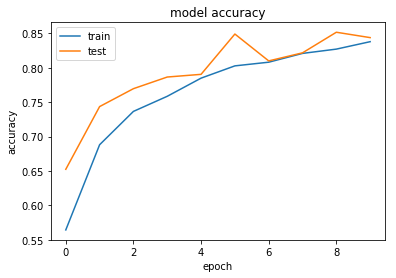

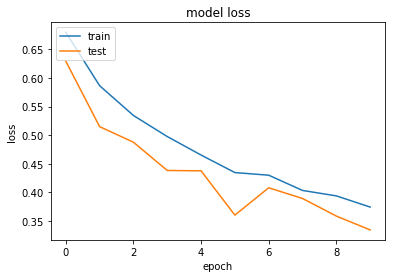

In [16]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()